In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer, fetch_california_housing, load_diabetes
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr, pearsonr

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.manifold import TSNE




In [4]:
# import os,sys
# %matplotlib inline
# import matplotlib.pylab as plt
# import numpy as np
# plt.rcParams['figure.dpi'] = 100
# plt.rcParams['savefig.dpi']=300

# plt.rcParams['pdf.fonttype']=42
# # sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
# import PyComplexHeatmap as pch
# print(pch.__version__)


In [11]:
# path_full = "C:/Users/46705/Documents/SpiderSilk/data/pre_filtering/all_annotated_lascID.csv"
path_all = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/filtered_all_fam.csv"
path_3 = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/filtered_3_fam.csv"
path_1 = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/filtered_1_fam.csv"
path_MaG = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/MaG_ara.csv"

mag =pd.read_csv(path_MaG, sep= ",")
# path_full_bool = ""
# path_filtered= ""
# path_filtered_ara = ""
# path_filtered_ara_bool = ""
# path_Gland_spec = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/gland_araneidae.csv"
# path_Gland_spec_bool = ""
# path_arakawa_spidroins = "C:/Users/46705/Documents/SpiderSilk/data/post_filtering/arakawa_anno_log_multisp.csv"
# path_arakawa_spidroins_bool = ""

all = pd.read_csv(path_all, sep= ",")
three = pd.read_csv(path_3, sep= ",")
one =pd.read_csv(path_1, sep= ",")



C:\Users\46705\AppData\Local\Temp\ipykernel_17032\2332284219.py:17: DtypeWarning: Columns (0,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,163,164,165,166,167,168,170,171,172,173,174,175,176,177,178,179,181,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,261,262,263,264,265,266,267,268,

In [12]:
all

,Orthogroup,ID,idv_id,DRR,species_x,Genus,Family,OG0000000,OG0000001,OG0000002,...,five_percent_weightloss,ten_percent_weightloss,crystallinity,birefringence,birefringence_sd,diameter,diameter_sd,water_content,supercontraction,supercontraction_sd
0,Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,geneName,NaN,NaN,NaN,NaN,NaN,NaN,"znf345_znf71_znf133_znf227_znf84,znf227_znf345...","tdpoz1_8,tdpoz5_7,spopl_2,tdpoz1_10,spopla_2,s...","LASC000900,LASC000902,LASC000903,LASC000906,LA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,product,NaN,NaN,NaN,NaN,NaN,NaN,Endothelial zinc finger protein induced by tum...,"TD and POZ domain-containing protein 1,hypothe...",hypothetical protein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lascID,NaN,NaN,NaN,NaN,NaN,NaN,"LASC000575,LASC000643,LASC000881,LASC001039,LA...","LASC000830,LASC000860,LASC000861,LASC000862,LA...","LASC000900,LASC000902,LASC000903,LASC000906,LA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,101-W7_S13,101.0,DRR296821,pilipes,Nephila,Araneidae,8.811687887311393,8.986630022236454,9.750225179608,...,NaN,NaN,26.0,39.6,10.4,2.75,0.09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,286,7441-W1_S4,7441.0,DRR168617,inaurata,Trichonephila,Araneidae,9.554096,9.380179,9.943833,...,285.0,304.0,24.0,47.5,9.7,6.69,0.63,5.8,43.3,3.6
271,287,7447-W1_S14,7447.0,DRR168618,geometricus,Latrodectus,Theridiidae,7.710529,7.491347,5.014255,...,288.0,309.0,27.0,45.1,5.8,2.49,0.20,6.0,21.4,2.6
272,288,7452-W1_S16,7452.0,DRR168637,-,Peucetia,Oxyopidae,9.229746,7.964728,3.468632,...,278.0,298.0,26.0,41.6,1.4,2.80,0.03,6.8,24.9,4.5
273,289,7607-W1_S14,7607.0,DRR221432,spinimana,Zoropsis,Zoropsidae,10.107566,5.534201,0.0,...,NaN,NaN,47.0,47.1,3.0,1.49,0.02,NaN,27.4,6.7


In [13]:
p = "C:/Users/46705/Documents/SpiderSilk/data/proteins_18.csv"
meta = pd.read_csv(p, sep=",")

In [14]:
meta_small= meta[["lascID", "Ortogroup", "geneNameProtein"]]

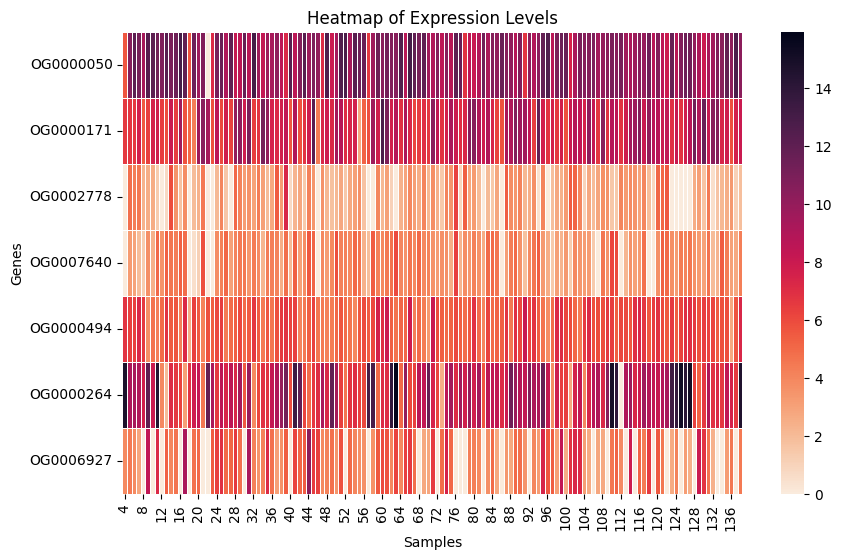

In [15]:


selected_data = one.iloc[4:, :][['OG0000050', 'OG0000171', 'OG0002778', 'OG0007640', 'OG0000494', 'OG0000264', 'OG0006927']].astype(float)


selected_data = selected_data.T


plt.figure(figsize=(10, 6))
sns.heatmap(selected_data, cmap='rocket_r', linewidths=.5)
plt.title('Heatmap of Expression Levels')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()

### Heatmap All fam  - hierarcial clustering 

In [16]:
OG_interest = ['OG0000282',
 'OG0008607',
 'OG0000264',
 'OG0004717',
 'OG0007747',
 'OG0007860',
 'OG0004409',
 'OG0000189']

In [17]:
# # all.iloc[4:, :].head(10)
# df_heatmap = all.iloc[4:, :][OG_interest].astype(float)
# # df = df.astype(float)
# # df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
# # df_heatmap.iloc[1, 2] = np.nan

# plt.figure(figsize=(3.5, 20))
# row_ha = pch.HeatmapAnnotation(all.Family)
# df_col = all.iloc[4:, :]["Family"]
# df_col.name = "Family"

In [18]:


# row_ha = pch.HeatmapAnnotation(label=anno_simple(df_heatmap.mean(axis=1).apply(lambda x:round(x,2)),
# #                                            cmap='jet'), #add_text=True,,text_kws={'rotation':0,'fontsize':10,'color':'black'}
# #                             # Avg=anno_barplot(df_heatmap.mean(axis=1).apply(lambda x:round(x,2)),
# #                             #                height=10,colors='orangered'),
# #                            selected=anno_label(df_rows,colors='red'),
# #                            axis=0,verbose=0,label_kws={'rotation':0,'horizontalalignment':'left'})



# #verbose=0 will turn off the log.
# cm = pch.ClusterMapPlotter(data=df_heatmap, col_cluster=True, row_dendrogram=True, show_rownames=True, row_names_side='right',
#                        tree_kws={'row_cmap': 'Set1','colors':'blue'},verbose=0,legend_gap=5,
#                        cmap='RdYlBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'}, right_annotation = row_ha)
# # ,
#                     #    col_cluster=True,row_cluster=True,
#                     #    col_split=all.Family,row_split=2,
#                     #    col_split_gap=0.5,row_split_gap=0.8,
#                     #    label='values',row_dendrogram=True,
#                     #    show_rownames=True,show_colnames=True,
#                     #    row_names_side='right',
#                     #    tree_kws={'row_cmap': 'Set1','colors':'blue'},verbose=0,legend_gap=5,
#                     #    cmap='RdYlBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
# # plt.savefig("example0.pdf", bbox_inches='tight')
# plt.show()

In [19]:
df_list= [all, three, one, mag]
# df_list= [all]
all

,Orthogroup,ID,idv_id,DRR,species_x,Genus,Family,OG0000000,OG0000001,OG0000002,...,five_percent_weightloss,ten_percent_weightloss,crystallinity,birefringence,birefringence_sd,diameter,diameter_sd,water_content,supercontraction,supercontraction_sd
0,Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,geneName,NaN,NaN,NaN,NaN,NaN,NaN,"znf345_znf71_znf133_znf227_znf84,znf227_znf345...","tdpoz1_8,tdpoz5_7,spopl_2,tdpoz1_10,spopla_2,s...","LASC000900,LASC000902,LASC000903,LASC000906,LA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,product,NaN,NaN,NaN,NaN,NaN,NaN,Endothelial zinc finger protein induced by tum...,"TD and POZ domain-containing protein 1,hypothe...",hypothetical protein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lascID,NaN,NaN,NaN,NaN,NaN,NaN,"LASC000575,LASC000643,LASC000881,LASC001039,LA...","LASC000830,LASC000860,LASC000861,LASC000862,LA...","LASC000900,LASC000902,LASC000903,LASC000906,LA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,101-W7_S13,101.0,DRR296821,pilipes,Nephila,Araneidae,8.811687887311393,8.986630022236454,9.750225179608,...,NaN,NaN,26.0,39.6,10.4,2.75,0.09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,286,7441-W1_S4,7441.0,DRR168617,inaurata,Trichonephila,Araneidae,9.554096,9.380179,9.943833,...,285.0,304.0,24.0,47.5,9.7,6.69,0.63,5.8,43.3,3.6
271,287,7447-W1_S14,7447.0,DRR168618,geometricus,Latrodectus,Theridiidae,7.710529,7.491347,5.014255,...,288.0,309.0,27.0,45.1,5.8,2.49,0.20,6.0,21.4,2.6
272,288,7452-W1_S16,7452.0,DRR168637,-,Peucetia,Oxyopidae,9.229746,7.964728,3.468632,...,278.0,298.0,26.0,41.6,1.4,2.80,0.03,6.8,24.9,4.5
273,289,7607-W1_S14,7607.0,DRR221432,spinimana,Zoropsis,Zoropsidae,10.107566,5.534201,0.0,...,NaN,NaN,47.0,47.1,3.0,1.49,0.02,NaN,27.4,6.7


In [20]:

family_stats = all.groupby('Family').agg({
    'Genus': 'nunique',
    'species_x': 'nunique'
}).reset_index()

family_stats.columns = ['Family', 'Number of Genera', 'Number of Species']

family_stats

,Family,Number of Genera,Number of Species
0,Agelenidae,1,1
1,Araneidae,40,81
2,Clubionidae,1,3
3,Deinopidae,1,1
4,Desidae,1,2
5,Dictynidae,1,1
6,Eutichuridae,1,3
7,Hersiliidae,1,1
8,Lycosidae,1,1
9,Mimetidae,1,2


In [21]:



counts = all['Family'].value_counts().reset_index()
counts.columns = ['Family', 'Count']

merged_df = pd.merge(family_stats, counts, on='Family', how='left')


sorted_df = merged_df.sort_values(by='Count', ascending = False)


sorted_df.to_csv("C:/Users/46705/Documents/SpiderSilk/output/stats/family.csv", index= False)

# latex_table = sorted_df.to_latex(index=False)
# print(latex_table)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 271 samples in 0.108s...
[t-SNE] Computed neighbors for 271 samples in 0.291s...
[t-SNE] Computed conditional probabilities for sample 271 / 271
[t-SNE] Mean sigma: 23.917149
[t-SNE] KL divergence after 250 iterations with early exaggeration: 140.125244
[t-SNE] KL divergence after 1000 iterations: 0.836986
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 195 samples in 0.045s...
[t-SNE] Computed neighbors for 195 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 195 / 195
[t-SNE] Mean sigma: 25.950257
[t-SNE] KL divergence after 250 iterations with early exaggeration: 138.053360
[t-SNE] KL divergence after 1000 iterations: 0.768313
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 135 samples in 0.023s...
[t-SNE] Computed neighbors for 135 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 135 / 135
[t-SNE] Mean sigma: 26.380266
[t-SNE] KL divergence after 250 ite

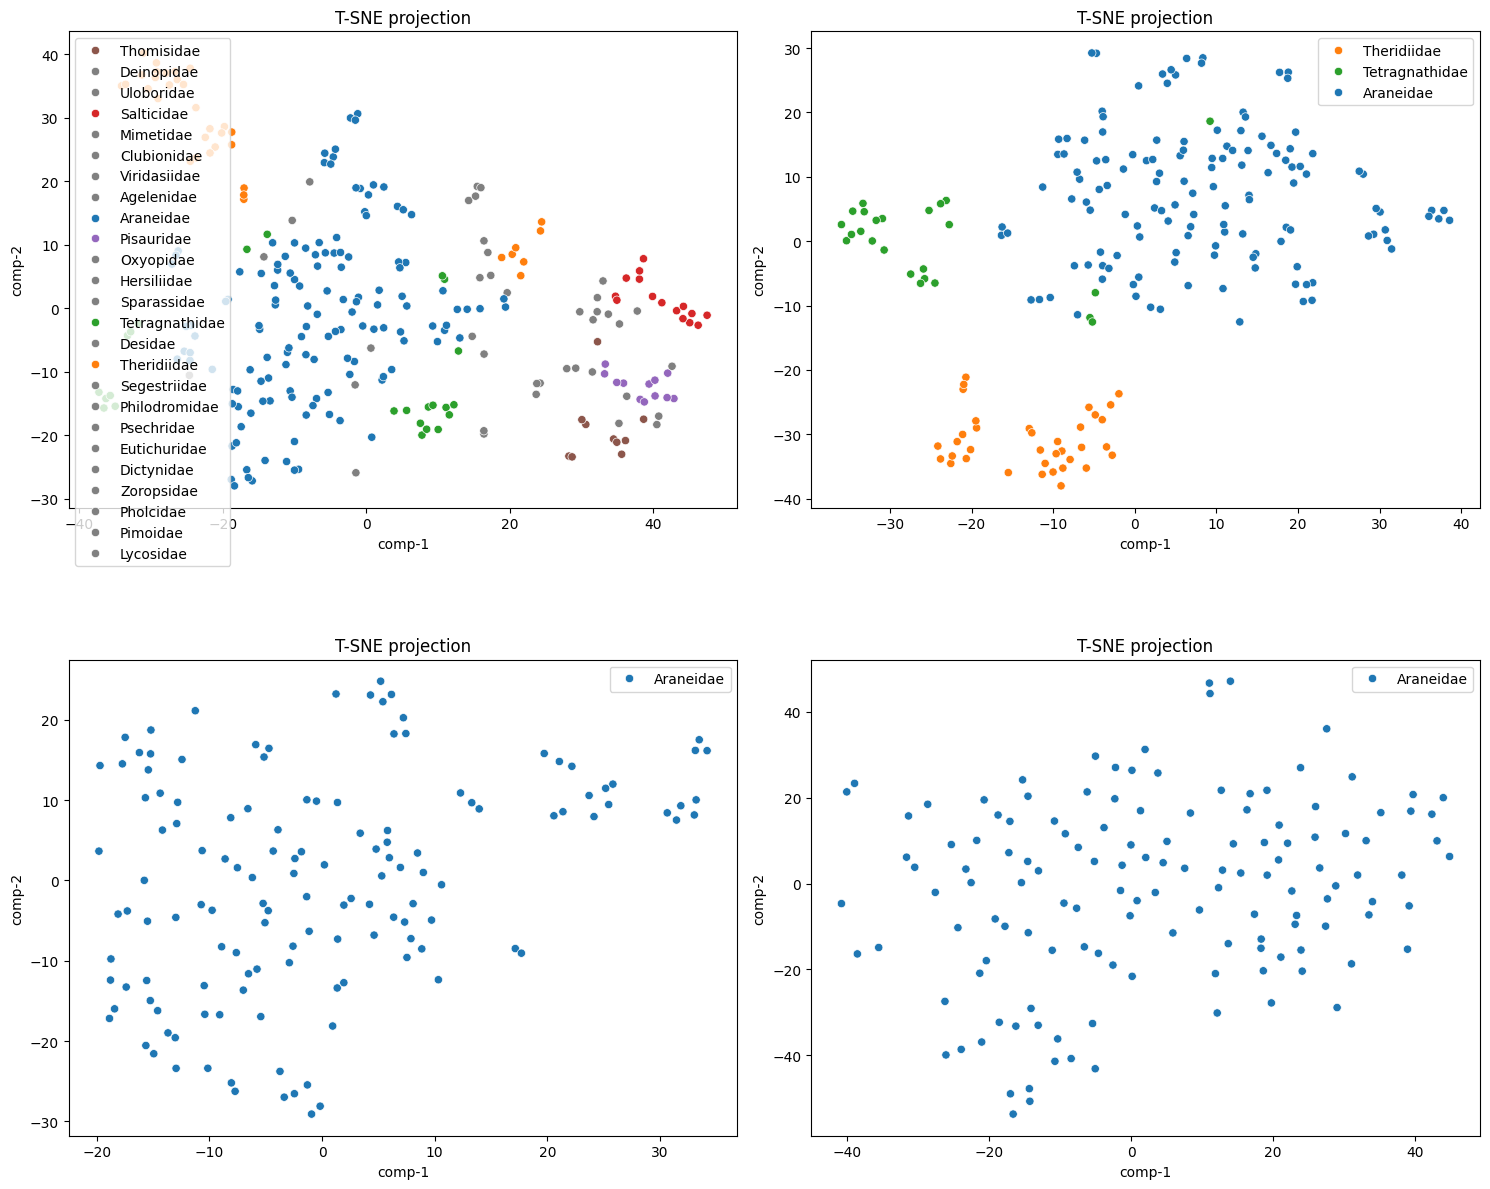

In [35]:
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

top_family_values = all['Family'].value_counts().nlargest(6).index
unique_colors = sns.color_palette('tab10', 6)

color_map = {}
for i, family_value in enumerate(top_family_values):
    color_map[family_value] = unique_colors[i]

common_color = 'gray'
other_families = [family_value for family_value in all['Family'].unique() if family_value not in top_family_values]
for family_value in other_families:
    color_map[family_value] = common_color

plt.figure(figsize=(15, 12))  

for i, df in enumerate(df_list): 
    data = df.iloc[4:, 7:-29].apply(pd.to_numeric, errors='coerce').fillna(0)

    tsne = TSNE(n_components=2, early_exaggeration=20.0, perplexity=10, verbose=1, random_state=123)
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(data)
    z = tsne.fit_transform(standardized_data) 
    df_tsne = df.iloc[4:, :7].copy()
    df_tsne["comp-1"] = z[:,0]
    df_tsne["comp-2"] = z[:,1]

    ax = plt.subplot(2, len(df_list)//2, i + 1) 
    sns.scatterplot(x="comp-1", y="comp-2", hue="Family", data=df_tsne, palette=color_map, ax=ax)
    plt.title(f"T-SNE projection")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=3)

    handles, labels = ax.get_legend_handles_labels()
    unique_labels = list(set(labels))
    unique_handles = [handles[labels.index(label)] for label in unique_labels]
    ax.legend(unique_handles, unique_labels)

plt.tight_layout()
plt.show()


In [23]:
df_pca = all.iloc[4:, 7:-29].apply(pd.to_numeric, errors='coerce').fillna(0)

In [24]:

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_pca)
df_standardized = pd.DataFrame(standardized_data, columns=df_pca.columns)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(df_pca)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

scaled_principal_components = principal_components
df_filtered_PC = all.iloc[4:,:].copy()  
df_filtered_PC["PC1"] = scaled_principal_components[:, 0]
df_filtered_PC["PC2"] = scaled_principal_components[:, 1]
df_filtered_PC["PC3"] = scaled_principal_components[:, 2]
df_filtered_PC["PC4"] = scaled_principal_components[:, 3]
df_filtered_PC["PC5"] = scaled_principal_components[:, 4]
df_filtered_PC["PC6"] = scaled_principal_components[:, 5]
df_filtered_PC["PC7"] = scaled_principal_components[:, 6]
df_filtered_PC["PC8"] = scaled_principal_components[:, 7]
df_filtered_PC["PC9"] = scaled_principal_components[:, 8]
df_filtered_PC["PC10"] = scaled_principal_components[:, 9]

df_filtered_PC.iloc[:, -10:].sum()

Explained Variance Ratio: [0.11457149 0.05966944 0.0465991  0.0350718  0.03394304 0.02248048
 0.01832123 0.01475517 0.01279805 0.01120753]


PC1     5.684342e-14
PC2     1.136868e-13
PC3     1.136868e-13
PC4    -4.263256e-14
PC5     2.273737e-13
PC6    -1.705303e-13
PC7    -1.136868e-13
PC8     1.136868e-13
PC9     0.000000e+00
PC10    5.684342e-14
dtype: float64

In [25]:
pca.explained_variance_ratio_.sum()

0.369417331242883

In [26]:
# df_filtered_PC.to_csv("C:/Users/46705/Documents/SpiderSilk/data/post_filtering/filtered_all_fam_pca.csv", index= False)

In [27]:
df_filtered_PC[df_filtered_PC["species_x"]== "livida"]

# # df_filtered_PC["species_x"].value_counts().head(25)

,Orthogroup,ID,idv_id,DRR,species_x,Genus,Family,OG0000000,OG0000001,OG0000002,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
253,269,7302-W1_S2,7302.0,DRR168615,livida,Nephilingis,Araneidae,9.319213,8.554962,10.625869,...,-56.596836,-33.288912,-47.279866,-5.772046,-7.364886,20.273122,-15.956168,40.630395,-17.402232,23.957575
254,270,7303-W1_S15,7303.0,DRR168616,livida,Nephilingis,Araneidae,9.375568,8.283283,11.100707,...,-48.013566,-28.052535,-23.512850,-12.487504,-11.941142,9.515586,-23.721482,35.707404,-17.813106,25.295747
255,271,7304-W1_S14,7304.0,DRR168619,livida,Nephilingis,Araneidae,9.153764,8.055435,10.117894,...,-55.233175,-24.917074,-47.091502,7.407459,-1.256305,19.389326,-19.022952,47.603229,-17.289628,22.844795
256,272,7305-W1_S12,7305.0,DRR168620,livida,Nephilingis,Araneidae,9.083481,8.610644,10.328069,...,-48.135175,-20.228923,-33.921435,-2.009571,-4.415144,19.884208,-14.642674,37.454623,-22.892876,28.904276
257,273,7306-W1_S13,7306.0,DRR168621,livida,Nephilingis,Araneidae,9.371142,8.169551,11.057235,...,-54.579843,-39.491902,-15.542472,12.707567,1.968558,21.530715,-12.545350,53.224258,-19.295507,25.856788


Trichonephila sp. 6st

Araneus 16

Larinioides 2st

Latrodectus 2st

In [28]:
df_filtered_PC[df_filtered_PC["Genus"]== "Metellina"]

,Orthogroup,ID,idv_id,DRR,species_x,Genus,Family,OG0000000,OG0000001,OG0000002,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
207,219,5938-W1_S5,5938.0,DRR297862,mengei,Metellina,Tetragnathidae,8.748993,6.239812,0.0,...,31.681616,47.449844,-4.704746,13.256092,23.963234,15.631314,-50.084519,-15.823622,-1.887214,-7.811123
208,220,5944-W1_S6,5944.0,DRR296867,merianae,Metellina,Tetragnathidae,8.914905,8.192338,1.537445,...,20.971450,35.952995,-33.524819,21.211262,28.930937,19.752508,-48.390503,-24.368394,7.605627,-7.307047
214,229,6084-W1_S23,6084.0,DRR297503,merianae,Metellina,Tetragnathidae,9.392046,8.421017,3.87309,...,21.169333,20.512795,43.211075,-49.163056,-16.263721,34.045251,-28.290723,-19.320276,1.764269,-3.820996


In [29]:
df_filtered_PC[df_filtered_PC["Genus"]== "Metallina"]
# "Trichonephila", "Araneus", "Larinioides", "Latrodectus", , "Leucauge", "Mesida", "Metleucauge", "Tetragnatha" "Cyrtophora",
listGenus= ["Mastophora", "Cladomelea", "Meta", "Cyrtarachne"]
# "Eriovixia", "Thelacantha",  "Neoscona", "Araneus", "Metellina", 

id_list = ["2674-W1_S16", "2801-W1_S5",   "3393-W1_S6",   "3799-W1_S24",  "4109-W1_S11", "4735-W1_S25",  "5268-W1_S12",  "6079-W1_S4",   "6795-W1_S8", "5938-W1_S5" , "5944-W1_S6", "6084-W1_S23" ] 

# # small chunck nesteled in araneidae
# "5938-W1_S5"  "5944-W1_S6"
# # big chunck nesteled in araneidae
# "2674-W1_S16" "2801-W1_S5"  "3393-W1_S6"  "3799-W1_S24" "4109-W1_S11" "4735-W1_S25"
# "5268-W1_S12" "6079-W1_S4"  "6795-W1_S8" 

# # araout
# "30-W22_S17", "5286-W1_S8"

# []"4781-W1_S22", "5570-W1_S9", "5595-W1_S11"]

In [30]:
samples_list = [
    "5938-W1_S5", "5944-W1_S6",  
    "2674-W1_S16", "2801-W1_S5", "3393-W1_S6", "3799-W1_S24", "4109-W1_S11", "4735-W1_S25",  
    "5268-W1_S12", "6079-W1_S4", "6795-W1_S8", 
    "30-W22_S17", "5286-W1_S8",  
    "4781-W1_S22", "5570-W1_S9", "5595-W1_S11"  
]

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 271 samples in 0.000s...
[t-SNE] Computed neighbors for 271 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 271 / 271
[t-SNE] Mean sigma: 1.054072


[t-SNE] KL divergence after 250 iterations with early exaggeration: 127.720009
[t-SNE] KL divergence after 1000 iterations: 0.640987


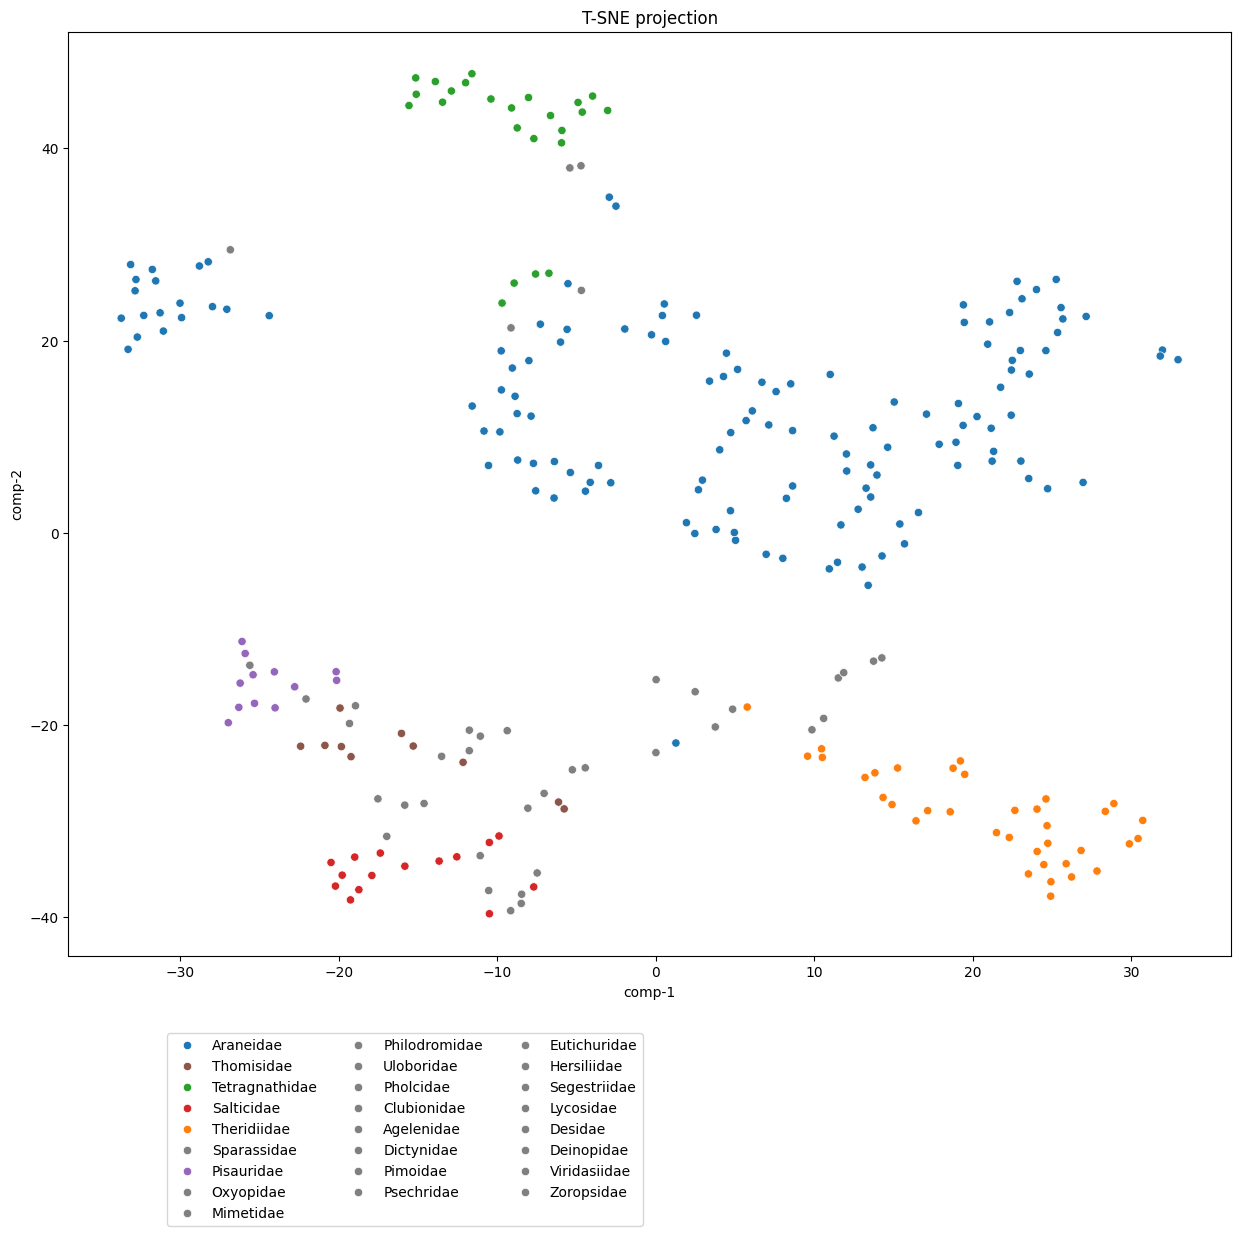

In [31]:
top_family_values = all['Family'].value_counts().nlargest(6).index
unique_colors = sns.color_palette('tab10', 6)

color_map = {}
for i, family_value in enumerate(top_family_values):
    color_map[family_value] = unique_colors[i]

common_color = 'gray'
other_families = [family_value for family_value in all['Family'].unique() if family_value not in top_family_values]
for family_value in other_families:
    color_map[family_value] = common_color
    
plt.figure(figsize=(15, 12))  

# data = all.iloc[4:, 7:-29].apply(pd.to_numeric, errors='coerce').fillna(0)
data = df_filtered_PC.iloc[:, -10:]


tsne = TSNE(n_components=2, early_exaggeration=20.0, perplexity=10, verbose=1, random_state=123)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
z = tsne.fit_transform(standardized_data) 
df_tsne = all.iloc[4:, :7].copy()
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue="Family", data=df_tsne, palette=color_map)

# for i, genus in enumerate(listGenus, start=1):
#       # 2 rows, len(df_list) // 2 columns
#     # sns.scatterplot(x="comp-1", y="comp-2", hue="Family", style="Genus", data=df_tsne, palette=color_map, ax=ax)
#     # Plot only the current genus with a distinct marker
#     sns.scatterplot(x="comp-1", y="comp-2", hue="Family", style="ID", data=df_tsne[df_tsne['Genus'] == genus], palette=color_map, legend=False, markers=['x'], s=100)
#     plt.title(f"T-SNE projection ({id})")
    
#     for x, y, label in zip(df_tsne[df_tsne['Genus'] == genus]['comp-1'], df_tsne[df_tsne['Genus'] == genus]['comp-2'], df_tsne[df_tsne['Genus'] == genus]['Genus']):
#         plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='left', va='bottom', fontsize=8)



plt.title(f"T-SNE projection")
plt.legend(loc='lower right', bbox_to_anchor=(0.5, -0.30), ncol=3)

## outliers sample id 

In [32]:
print(mag.loc[1,: ]["OG0000264"])

Spice_3,Spice_4,Spice_5,Spice_6,Spice_2,Spice_1,Spice_7,Spice_8,Spice_9,Spice_10,Spice_11,Spice_12,Spice_13,Spice_14,Spice_15,Spice_16


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 271 samples in 0.011s...
[t-SNE] Computed neighbors for 271 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 271 / 271
[t-SNE] Mean sigma: 1.054072
[t-SNE] KL divergence after 250 iterations with early exaggeration: 127.720009
[t-SNE] KL divergence after 1000 iterations: 0.640987


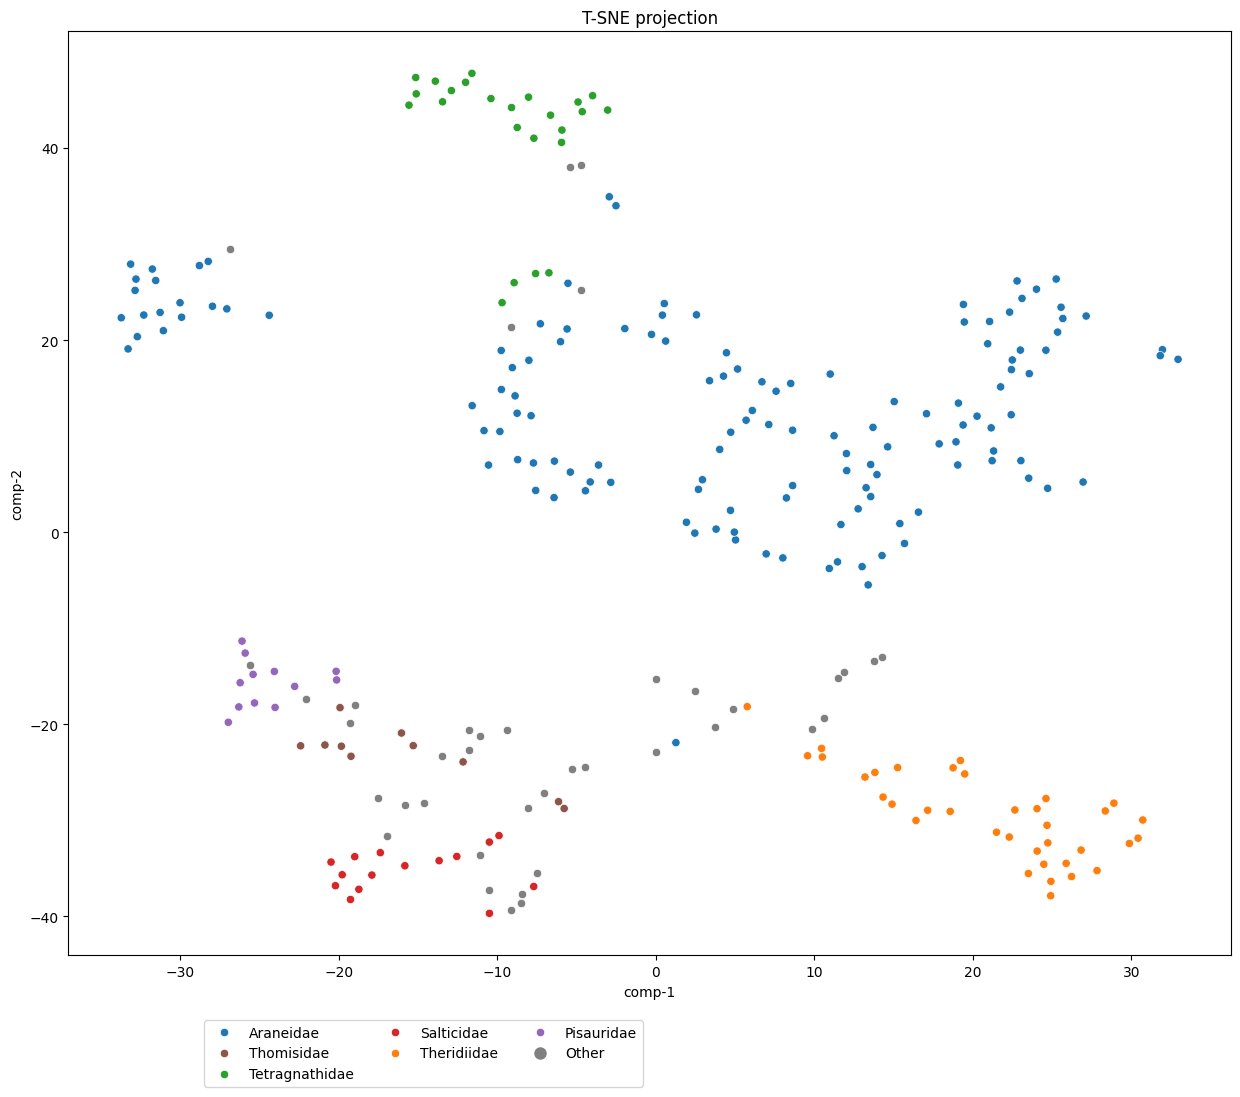

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


plt.figure(figsize=(15, 12))  

data = df_filtered_PC.iloc[:, -10:]

tsne = TSNE(n_components=2, early_exaggeration=20.0, perplexity=10, verbose=1, random_state=123)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
z = tsne.fit_transform(standardized_data) 
df_tsne = all.iloc[4:, :7].copy()
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]


top_families = df_tsne['Family'].value_counts().nlargest(6).index.tolist()


df_filtered = df_tsne[df_tsne['Family'].isin(top_families)]


sns.scatterplot(x="comp-1", y="comp-2", hue="Family", data=df_filtered, palette=color_map)


other_data = df_tsne[~df_tsne['Family'].isin(top_families)]
sns.scatterplot(x="comp-1", y="comp-2", color='gray', data=other_data, legend=False, label='Other')


# for id in samples_list:

#     sns.scatterplot(x="comp-1", y="comp-2", hue="Family", style="ID", data=df_tsne[df_tsne['ID'] == id], palette=color_map, legend=False, markers=['x'], s=100)
#     for x, y, label in zip(df_filtered[df_filtered['ID'] == id]['comp-1'], df_filtered[df_filtered['ID'] == id]['comp-2'], df_filtered[df_filtered['ID'] == id]['ID']):
#         plt.annotate(label, (x, y), textcoords="offset points", xytext=(5,5), ha='left', va='bottom', fontsize=8)


handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = {lab: h for h, lab in zip(handles, labels)}
plt.legend(handles=[unique_labels[lab] for lab in unique_labels if lab in top_families] + [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Other')], loc='lower right', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.title("T-SNE projection")
plt.show()


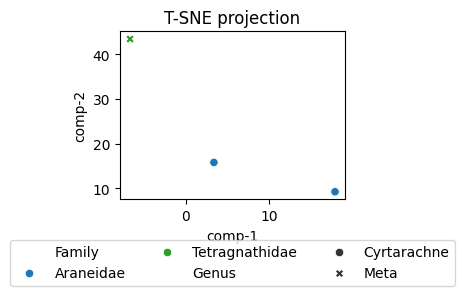

In [37]:
ax = plt.subplot(2, len(df_list)//2, i + 1)  # 2 rows, len(df_list)//2 columns
sns.scatterplot(x="comp-1", y="comp-2", hue="Family", style="Genus", data=df_tsne[df_tsne['Genus'].isin(listGenus)], palette=color_map, ax=ax)
plt.title(f"T-SNE projection")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=3)

In [39]:
lowest_indices = one['toughness'].nsmallest(4).index
highest_indices = one['toughness'].nlargest(4).index

lowest_rows = one.loc[lowest_indices]
highest_rows = one.loc[highest_indices]

result = pd.concat([lowest_rows, highest_rows])

check = pd.concat([result.iloc[:, :7], result[["toughness"]]], axis = 1)
check

,Orthogroup,ID,idv_id,DRR,species_x,Genus,Family,toughness
68,136,5018-W1_S10,5018.0,DRR296908,-,-,Araneidae,0.015
8,5,1974-W1_S8,1974.0,DRR297664,marmoreus,Araneus,Araneidae,0.023
47,68,3897-W1_S20,3897.0,DRR296775,anastera,Eustala,Araneidae,0.025
53,98,4419-W1_S7,4419.0,DRR297465,hamulata,Cyclosa,Araneidae,0.030
125,271,7304-W1_S14,7304.0,DRR168619,livida,Nephilingis,Araneidae,0.390
108,245,6727-W1_S17,6727.0,DRR296458,keyserlingi,Argiope,Araneidae,0.368
36,53,3793-W1_S12,3793.0,DRR297109,zilloides,Metazygia,Araneidae,0.310
128,274,7320-W1_S10,7320.0,DRR168629,-,Cyrtophora,Araneidae,0.303


In [40]:
one[one["Genus"] == "Nephilingis"].iloc[:, -20:]


,size,toughness,toughness_sd,young's_modulus,young's_modulus_sd,tensile_strength,tensile_strength_sd,strain_at_break,strain_at_break_sd,one_percent_weightloss,five_percent_weightloss,ten_percent_weightloss,crystallinity,birefringence,birefringence_sd,diameter,diameter_sd,water_content,supercontraction,supercontraction_sd
123,25.0,0.250,0.057,13.10,1.60,1.90,0.20,23.7,2.9,236.0,292.0,309.0,30.0,51.9,6.2,3.96,0.19,4.6,27.2,9.0
124,25.0,0.181,0.052,8.78,2.15,1.63,0.17,22.5,5.6,223.0,282.0,303.0,33.0,45.4,6.0,3.86,0.20,4.9,NaN,NaN
125,24.0,0.390,0.127,16.90,6.52,2.97,0.17,21.4,6.0,236.0,290.0,307.0,35.0,40.9,11.6,3.37,0.43,5.8,22.1,2.5
126,25.0,0.131,0.049,9.93,2.82,1.55,0.16,15.7,4.2,231.0,289.0,307.0,24.0,52.9,3.7,3.51,0.14,5.3,NaN,NaN
127,23.0,0.095,0.032,6.70,0.29,0.53,0.08,25.3,5.1,240.0,290.0,308.0,34.0,50.8,1.9,2.63,0.05,5.6,20.8,4.9


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 271 samples in 0.049s...
[t-SNE] Computed neighbors for 271 samples in 0.237s...
[t-SNE] Computed conditional probabilities for sample 271 / 271
[t-SNE] Mean sigma: 23.917149
[t-SNE] KL divergence after 250 iterations with early exaggeration: 140.125244
[t-SNE] KL divergence after 1000 iterations: 0.836986
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 195 samples in 0.034s...
[t-SNE] Computed neighbors for 195 samples in 0.114s...
[t-SNE] Computed conditional probabilities for sample 195 / 195
[t-SNE] Mean sigma: 25.950257
[t-SNE] KL divergence after 250 iterations with early exaggeration: 138.053360
[t-SNE] KL divergence after 1000 iterations: 0.768313
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 135 samples in 0.002s...
[t-SNE] Computed neighbors for 135 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 135 / 135
[t-SNE] Mean sigma: 26.380266
[t-SNE] KL divergence after 250 ite

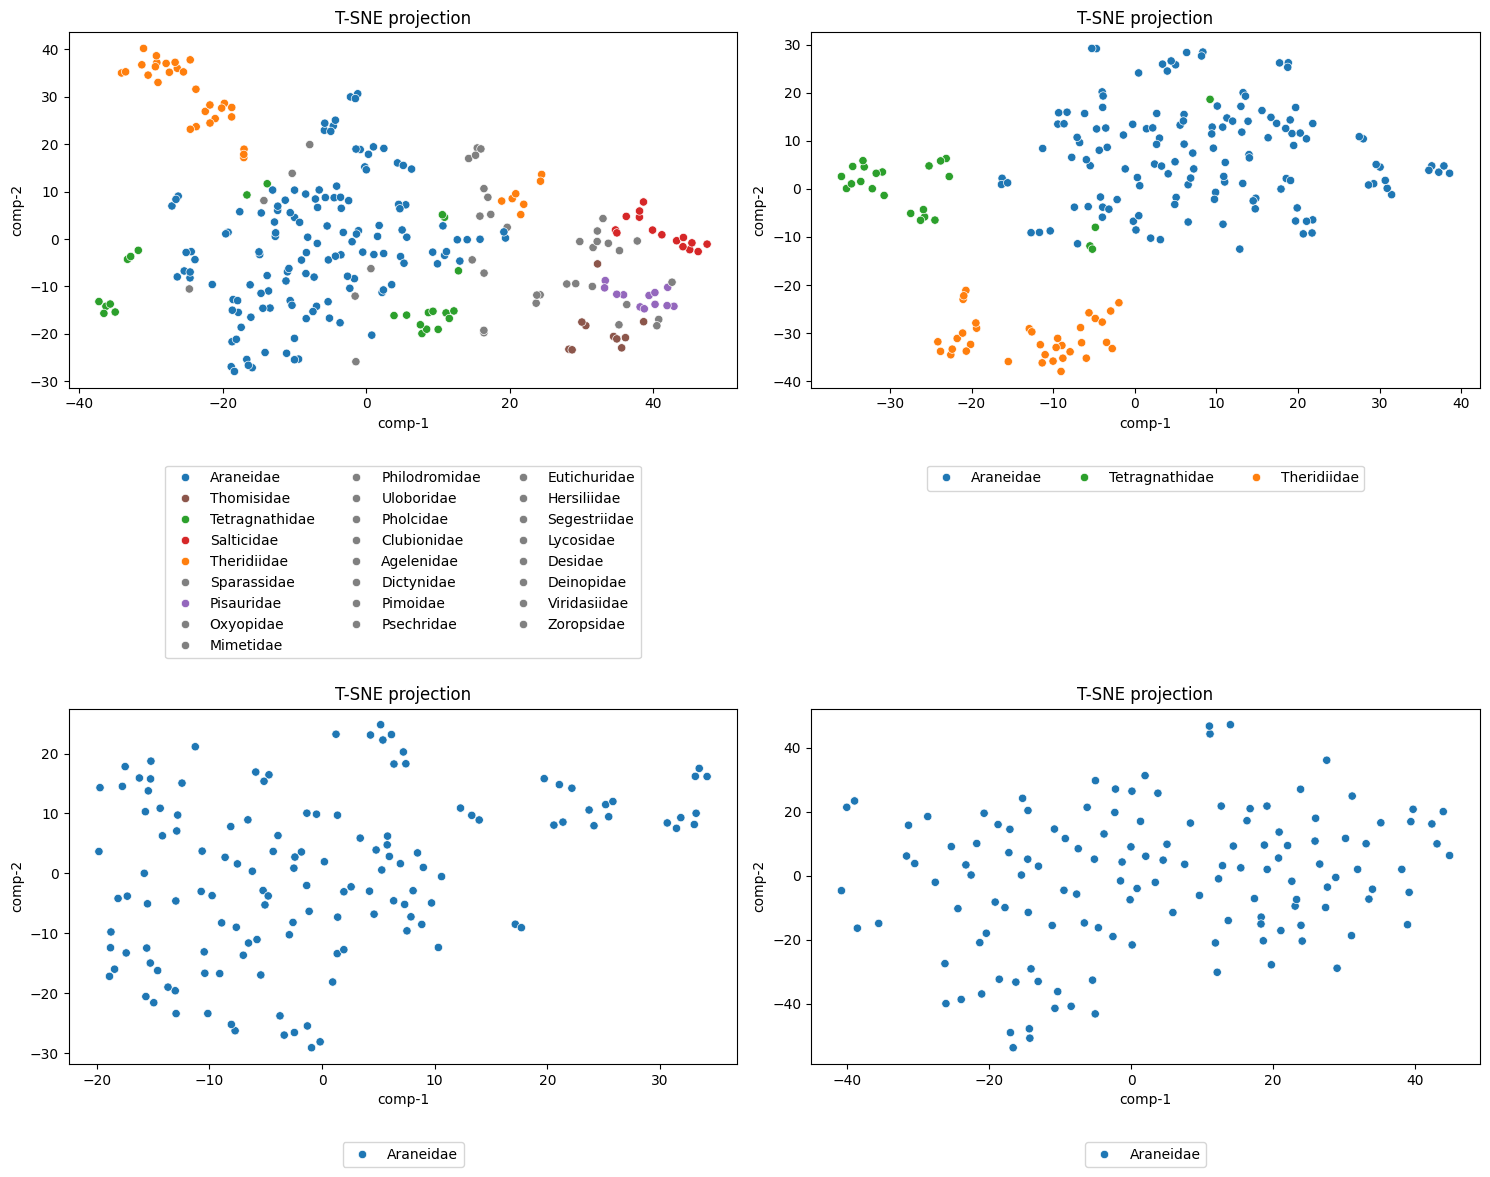

In [ ]:
top_family_values = all['Family'].value_counts().nlargest(6).index
unique_colors = sns.color_palette('tab10', 6)

color_map = {}
for i, family_value in enumerate(top_family_values):
    color_map[family_value] = unique_colors[i]

common_color = 'gray'
for family_value in all['Family'].unique():
    if family_value not in top_family_values:
        color_map[family_value] = common_color

plt.figure(figsize=(15, 12))  

for i, df in enumerate(df_list): 
    data = df.iloc[4:, 7:-29].apply(pd.to_numeric, errors='coerce').fillna(0)

    tsne = TSNE(n_components=2, early_exaggeration=20.0, perplexity=10, verbose=1, random_state=123)
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(data)
    z = tsne.fit_transform(standardized_data) 
    df_tsne = df.iloc[4:, :7].copy()
    df_tsne["comp-1"] = z[:,0]
    df_tsne["comp-2"] = z[:,1]

    ax = plt.subplot(2, len(df_list)//2, i + 1)  # 2 rows, len(df_list)//2 columns
    sns.scatterplot(x="comp-1", y="comp-2", hue="Family", data=df_tsne, palette=color_map, ax=ax)
    plt.title(f"T-SNE projection")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=3)
    
    

plt.tight_layout()
plt.show()


In [ ]:
# # full = pd.read_csv(path_full, sep= ",")
# gland_ara = pd.read_csv(path_Gland_spec, sep= ",")
# arakawa_sp = pd.read_csv(path_arakawa_spidroins, sep= ",")

In [ ]:
# arakawa_sp = pd.concat([arakawa_sp.iloc[:4], arakawa_sp[arakawa_sp["Family"] == "Araneidae"]])


In [ ]:

# column_names = ['Data', '# Samples', 'Dimensions', 'Spidroin groups', 'SpiCE groups']
column_names = ['Data', '# Samples', 'Dimensions']
df_dataset_info = pd.DataFrame(columns=column_names)
datasets = [gland_ara, arakawa_sp]


NameError: name 'gland_ara' is not defined

In [ ]:
dataset = []
num_samples = []
dimensions = []
spidroin_groups = []
spiCE_groups = []

In [ ]:

value_counts_row_0 = gland_ara.iloc[0].value_counts()

print("Value counts for row 0:")
print(value_counts_row_0)


Value counts for row 0:
0
Spidroin    3
Group       1
SpiCE       1
Name: count, dtype: int64


In [ ]:
for df in datasets: 
    df_ = df.iloc[4:, 7:-29]
    num_rows, num_cols = df_.shape
    dataset.append(df)
    num_samples.append(num_rows)
    dimensions.append(num_cols)
    spidroin_count = df.iloc[0].value_counts().get("Spidroin", 0)
    spiCE_count = df.iloc[0].value_counts().get("SpiCE", 0)
    filtered_rows = pd.DataFrame()

    filtered_rows = df.loc[:, df.iloc[0] == "Spidroin"]
    values_rows_1_to_3 = filtered_rows.iloc[1]
    result = ""
    values = values_rows_1_to_3.index.tolist()
    for value in values:
        result += value + " "
    spidroin_groups.append(result)

    filtered_rows = pd.DataFrame()
    filtered_rows = df.loc[:, df.iloc[0] == "SpiCE"]
    values_rows_1_to_3 = filtered_rows.iloc[1]
    result = ""
    values = values_rows_1_to_3.index.tolist()
    for value in values:
        result += value + " "
    spiCE_groups.append(result)


    


In [ ]:
# dataset.append()
# num_samples.append()
# dimensions.append()
# spidroin_groups.append()
# spiCE_groups.append()

In [ ]:

new_rows = pd.DataFrame({
    'Data': dataset,
    '# Samples': num_samples,
    'Dimensions': dimensions,
    'Spidroin groups': spidroin_groups,
    'SpiCE groups': spiCE_groups
})

df_dataset_info = pd.concat([df_dataset_info, new_rows], ignore_index=True)

df_dataset_info

,Data,# Samples,Dimensions,Spidroin groups,SpiCE groups
0,Orthogroup ID idv_id DRR...,135,186,OG0000050 OG0002778 OG0007640,OG0000264
1,Orthogroup ID idv_id DRR...,133,12,,
